# Articles Recommendation Categorization

Recommending web articles for the learners for different study programs

In this project, I will apply machine learning algorithms to construct a model that classify the web articles for the learners of Online learning platform into group

### 1) Import libraries


In [5]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('white')

import re 
import nltk 
import spacy
import string
import itertools
import contractions
from bs4 import BeautifulSoup
nltk.download('stopwords')
from nltk.corpus import stopwords
from spacy.lang.en.stop_words import STOP_WORDS
from nltk.tokenize import RegexpTokenizer
from collections import Counter 
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\amr_a\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 2) Data Loading

In [6]:
# Read the dataset from csv file
df = pd.read_json("../Data/articles.json")
df.head()

,body,title,category
0,Protecting Netflix Viewing Privacy at Scale\r\...,Protecting Netflix Viewing Privacy at Scale,Engineering
1,Introducing Winston — Event driven Diagnostic ...,Introducing Winston - Event driven Diagnostic ...,Engineering
2,Performance & Usage at Instagram\r\n\r\nAt Ins...,Performance & Usage at Instagram,Engineering
3,The simple example of calculating and formatti...,Refactoring a javascript video store,Engineering
4,Billing applications have transactions that ne...,Netflix Billing Migration to AWS - Part III,Engineering


In [7]:
for row in df.head(10).iterrows():
    print(row[1]['category'], row[1]['title'], row[1]['body']) 

Engineering Protecting Netflix Viewing Privacy at Scale Protecting Netflix Viewing Privacy at Scale

On the Open Connect team at Netflix, we are always working to enhance the hardware and software in the purpose-built Open Connect Appliances (OCAs) that store and serve Netflix video content. As we mentioned in a recent company blog post, since the beginning of the Open Connect program we have significantly increased the efficiency of our OCAs — from delivering 8 Gbps of throughput from a single server in 2012 to over 90 Gbps from a single server in 2016. We contribute to this effort on the software side by optimizing every aspect of the software for our unique use case — in particular, focusing on the open source FreeBSD operating system and the NGINX web server that run on the OCAs.

Members of the team will be presenting a technical session on this topic at the Intel Developer Forum (IDF16) in San Francisco this month. This blog introduces some of the work we’ve done.

Adding TLS to 

In [8]:
df.shape

(2481, 3)

### 3) EDA

In [9]:
# Find all category
category = list(df['category'].unique())
category

['Engineering', 'Startups & Business', 'Product & Design']

In [10]:
categories = df.groupby('category')
print("Train Total Categories:", categories.ngroups)
print(categories.size())

Train Total Categories: 3
category
Engineering             558
Product & Design        852
Startups & Business    1071
dtype: int64


In [11]:
# Check null values
df.isnull().sum()

body        0
title       0
category    0
dtype: int64

In [12]:
df.duplicated().sum()

20

In [13]:
df.drop_duplicates(inplace=True)

### 4. Visualizationm

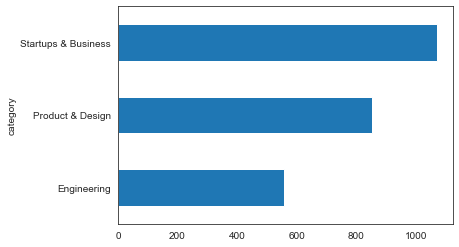

In [14]:
categories.size().plot(kind='barh')
plt.show();

<AxesSubplot:ylabel='category'>

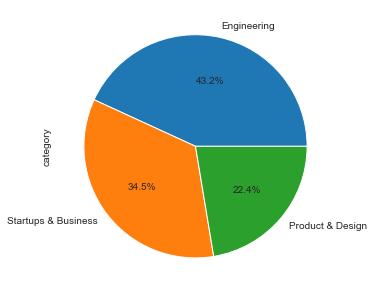

In [15]:
labels = category

fig, ax = plt.subplots(1, 1, figsize=(5,10))
df['category'].value_counts().plot.pie(autopct = '%1.1f%%', labels=labels)

### 5. Text Preprocessing

Normally texts have:
<ol>
<li>too many spelling mistakes in the text</li>
<li>too many numbers and punctuations</li>
<li>too many emojis and emoticons and username and links too. </li>
<li>Some of the text parts are not in the English language. Data is having a mixture of more than one language</li>
<li>Some of the words are combined with the hyphen or data having contractions word or Repetitions of words.</li>

</ol>

<p>Here i will clean the text by doing the following steps:
<ol>

<li>Ensure category name consistency</li>
<li>Lowecasing the data</li>
<li>Removing Puncuatations</li>
<li>Removing Numbers</li>
<li>Removing extra space</li>
<li>Removing Contractions</li>
<li>Removing HTML tags</li>
<li>Removing & Finding URL and Email id</li>
<li>Removing Stop Words</li>
<li>Standardizing and Spell Check</li>
</ol>


In [16]:
# 1) Ensure category name consistency

df1 = df.loc[(df['category'] != 'Engineering') & 
            (df['category'] != 'Product & Design') & 
            (df['category'] != 'Startups & Business')]

df1.head()

,body,title,category


In [17]:
# 2) Normalizing Text (lower) 

def normalize(content):
    content = content.lower()
    return content

# 3) Removing Puncuatations

def remove_punct(content):
    content = content.translate(content.maketrans("", "", string.punctuation))
    return content

#  4) cleaning digits

def remove_num(content):
    content = ''.join([i for i in content if not i.isdigit()])

    return content

# 5) Remove extra-space

def remove_spaces(content):
    content = " ".join(content.split())

    return content

# 6)# Remove Contraction

def remove_cont(content):
    content = contractions.fix(content)
    
    return content

# 7) Remove Html Tags

def remove_html(content):
    # parse html content
    soup = BeautifulSoup(content, "html.parser")

    for data in soup(['style', 'script', 'code', 'a']):
        # Remove tags
        data.decompose()
    # return data by retrieving the tag content
    content = ' '.join(soup.stripped_strings)
    
    return content

# 8) Remove URLs and E-mails (UniCode)

def remove_unicode(content):
    content = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", content)
    return content

# 9) Removing Stop Words

def remove_stopword(content):
    STOPWORDS = set(stopwords.words('english'))
    content = " ".join([word for word in str(content).split() if word not in STOPWORDS])
    return content

# 10) Standardizing and Spell Check

def Standardize(content):
    content = ''.join(''.join(s)[:2] for _, s in itertools.groupby(content))
    spell = Speller(lang='en')
    content = spell(content)
    return content

# 11) Remove some Extra-words

def remove_extrawords(content):
    stop=['href','lt','gt','ii','iii','ie','quot','com']  ## This all words are most repeated words it does not make any sense
    content = content.split(" ")
    filtered_list=[]
    for i in content:
        if i not in stop:
            filtered_list.append(i)
            
    content = ' '.join(filtered_list)
    return content

In [18]:
def clean_text(content):
    
    # Normalize
    
    Normalized_content = normalize(content)
    
    # Removing Puncuatations
    
    clean_content = remove_punct(Normalized_content)

    # cleaning digits

    clean_content = remove_num(clean_content)

    # Remove extra-space
    
    clean_content = remove_spaces(clean_content)
    
    # Remove Contraction

    clean_content = remove_cont(clean_content)
    
    # Remove Html Tags

    clean_content = remove_html(clean_content)
    
    # Remove URLs and E-mails (UniCode)

    clean_content = remove_unicode(clean_content)
    
    # Removing Stop Words

    clean_content = remove_stopword(clean_content)

    # Remove some Extra-words
    
    clean_content = remove_extrawords(clean_content)

    return clean_content

In [19]:
df['body'] = df['body'].apply(clean_text)

### 6 ) Saving datasets obtained from preprocessing.

In [20]:
df.to_json(r'../Data/cleaned_articles.json')